## NYC TAXI DURATION -  EXPLORATORY DATA ANLAYSIS

### `PROBLEM DEFINATION`

We have a data set with 729322 rows and 11 columns. There are 10 features and 1 target variable which is trip_duration. We need to performa exploratory data analysis and provide our results.


__`Demographic information of Customer & Vendor`__

  - id : A unique identifier for each trip


  - vendor_id : A code indicating the provider associated with the trip record


  - passenger_count : The number of passengers in the vehicle (driver entered value)



    
__`INFORMATION ABOUT TRIP`__

  - pickup_longitude : Date and Time when the meter was engaged


  - pickup_latitude : Date and Time when the meter was disengaged


  - dropoff_longitude : The longitude where the meter was disengaged


  - dropoff_latitude : The latitude where the meter was disengaged


  - store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)


  - trip_duration : (target) duration of the trip in seconds.

### `IMPORT LIBRARIES`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime 

%matplotlib inline

### `IMPORT DATASET`

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

print("Data Imported Succesfully")

Data Imported Succesfully


We read the dataset into the DataFrame `data` and will have a look at the shape , columns and top 5 rows of the data. This will give a brief overview of the data at hand.

In [3]:
# Getting Dimension 

data.shape

(729322, 11)

In [4]:
# Reading Top Rows 

data.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635


In [5]:
# Checking Column Names

data.keys()

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### `VARIABLE IDENTIFICATION & TYPCASTING`

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Summary : 

  - `ID` coloumn can be ignored as it is a unique identifier, so we will drop id column.
  
  
  - `Vendor_ID` coloumn has only 2 values which can act as a categorical data type.
  
  
  - `PickUp Datetime` & `Dropoff Datetime` needs to be typcasted into datetime for better analysis.
  
  
  - `Store_Fwd_FLag` can act as categorical value.
  
  
  - Rest of the values which are related to trip information can remian same.

> > __`TYCASTING`__

In [7]:
data.drop(columns = 'id',
          axis = 1,
          inplace  = True)

data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

data['pickup_datetime']  = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime']) 

> > __`DATETIME VALUES`__

In [8]:
# Day

data['Pickup_Day']  = data['pickup_datetime'].map(lambda x : x.day_name())
data['Dropoff_Day'] = data['dropoff_datetime'].map(lambda x : x.day_name())

In [9]:
# Month

data['Month'] = data['pickup_datetime'].map(lambda x : x.month_name())

In [10]:
# Hour 

data['Pickup_HR']  = data['pickup_datetime'].map(lambda x : x.hour)
data['Dropoff_HR'] = data['dropoff_datetime'].map(lambda x : x.hour)

Summary : 

 - Extracting details like `Day`, `Month`, and `Hour` can help us to dig at granular level insights of the data.

In [11]:
data.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_Day,Dropoff_Day,Month,Pickup_HR,Dropoff_HR
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18


<br>

In [12]:
# Repositioning of columns

#columns_list = data.columns.tolist()

'''
columns_list = [
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'Day',
 'Month',
 'Hour',
 'Minute',
 'trip_duration']
'''

#data = data[columns_list]
#data.head(3)

"\ncolumns_list = [\n 'vendor_id',\n 'pickup_datetime',\n 'dropoff_datetime',\n 'passenger_count',\n 'pickup_longitude',\n 'pickup_latitude',\n 'dropoff_longitude',\n 'dropoff_latitude',\n 'store_and_fwd_flag',\n 'Day',\n 'Month',\n 'Hour',\n 'Minute',\n 'trip_duration']\n"

In [13]:
# Capitalize Column Name

columns_list = data.columns.tolist()

merged_list = list(map(lambda x : x.capitalize(), columns_list))

data.columns = merged_list
data.head(3)

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18


<BR>

### `UNIVARIANT ANALYSIS`

> > __`VENDOR-ID`__

In [14]:
data['Vendor_id'].value_counts()

2    390481
1    338841
Name: Vendor_id, dtype: int64

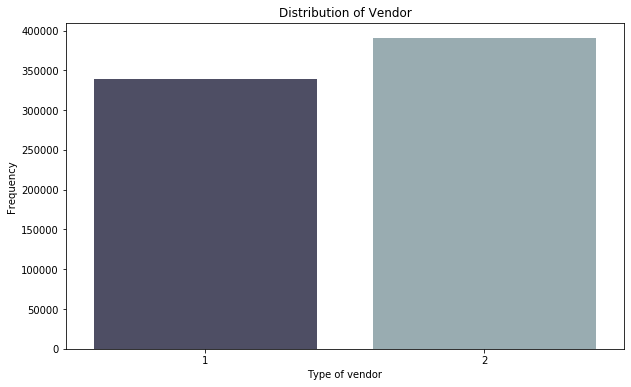

In [15]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Vendor_id',
              data = data,
              palette = 'bone')
plt.xlabel("Type of vendor")
plt.ylabel("Frequency")
plt.title("Distribution of Vendor")

plt.show()

Summary : 
    
  - We have more nos of vendors coming from category 2 and less number of vendors coming from category 1.
  
  
  - We will be have to analyze it further and see if it has impact on trip_duration.

> > __`PASSENGER COUNT`__

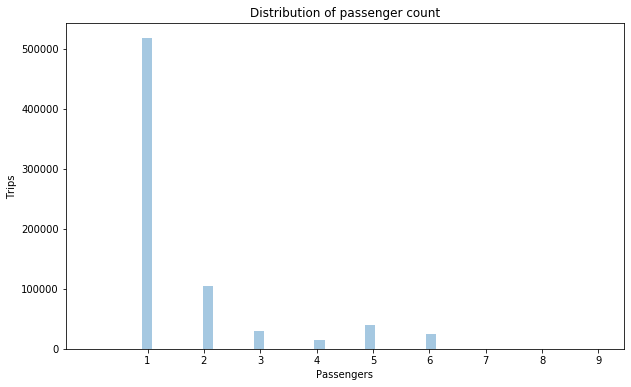

In [16]:
plt.figure(figsize = (10,6))

sns.distplot(data['Passenger_count'],
             kde = False)
plt.xticks(np.arange(1,10))
plt.xlabel("Passengers")
plt.ylabel("Trips")
plt.title("Distribution of passenger count", fontsize = 12)

plt.show()

Summary : 

 - We can see that mostly 1 or 2 passengers are available in the cab.
 
 
 - Very few passengers are to be seen travelling in large group.

> > __`PICKUP & DROP DAY_OF_WEEK`__

In [17]:
data['Pickup_datetime'].nunique()

709359

In [18]:
data['Dropoff_datetime'].nunique()

709308

Getting different values tells us that there are different pickup and drop off dates in the 2 columns.

In [19]:
data.Pickup_day.value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: Pickup_day, dtype: int64

In [20]:
data.Dropoff_day.value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: Dropoff_day, dtype: int64

Text(0.5, 1.0, 'Dropoff Day VS Frequency')

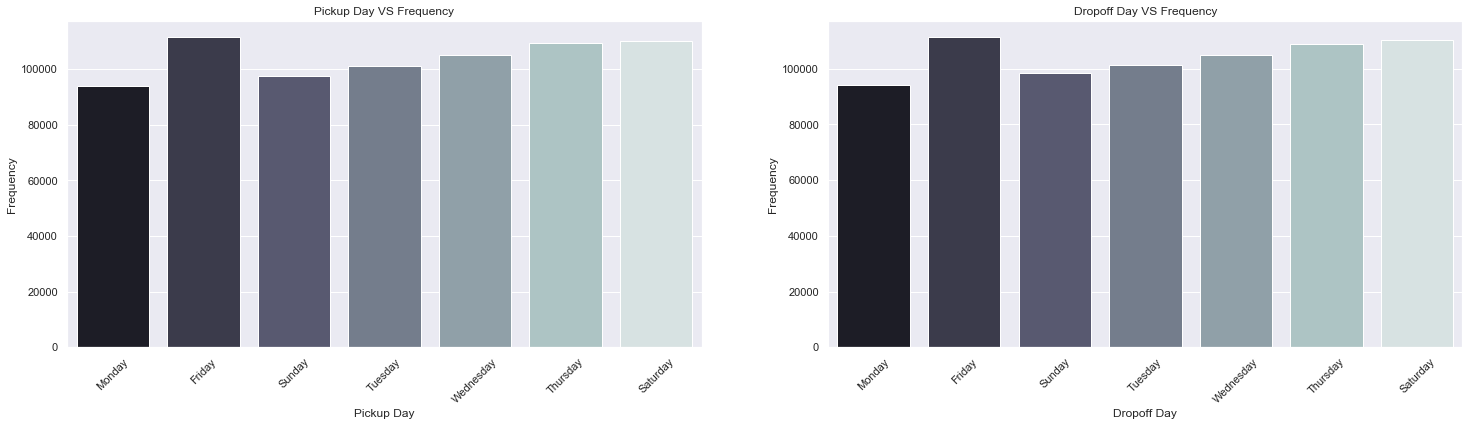

In [21]:
plt.figure(figsize = (25,6))
sns.set()

plt.subplot(1,2,1)
sns.countplot(x = 'Pickup_day',
              data = data,
              palette = 'bone')
plt.xticks(rotation=45)
plt.xlabel('Pickup Day')
plt.ylabel('Frequency')
plt.title('Pickup Day VS Frequency')

plt.subplot(1,2,2)
sns.countplot(x = 'Dropoff_day',
              data = data,
              palette = 'bone')
plt.xticks(rotation=45)
plt.xlabel('Dropoff Day')
plt.ylabel('Frequency')
plt.title('Dropoff Day VS Frequency')

Summary : 

 -`Pickup's` are more on Friday and less on Monday
 
 -`Drop's` also seems to follow same trend as that of pickup.

> > __`PICKUP & DROPOFF HOURS_OF_DAY`__

In [22]:
def timezone(x):
    if x >= 4 and x <= 10:
        return 'Morning'
    elif x >= 11 and x <= 16:
        return 'Mid-Day'
    elif x >= 17 and x <= 22:
        return 'Evening'
    else:
        return 'Late-Evening'

In [23]:
data['Pickup_timezone']  = data['Pickup_hr'].map(lambda x : timezone(x))
data['Dropoff_timezone'] = data['Dropoff_hr'].map(lambda x : timezone(x))

In [24]:
data.head(3)

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr,Pickup_timezone,Dropoff_timezone
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16,Mid-Day,Mid-Day
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23,Late-Evening,Late-Evening
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18,Evening,Evening


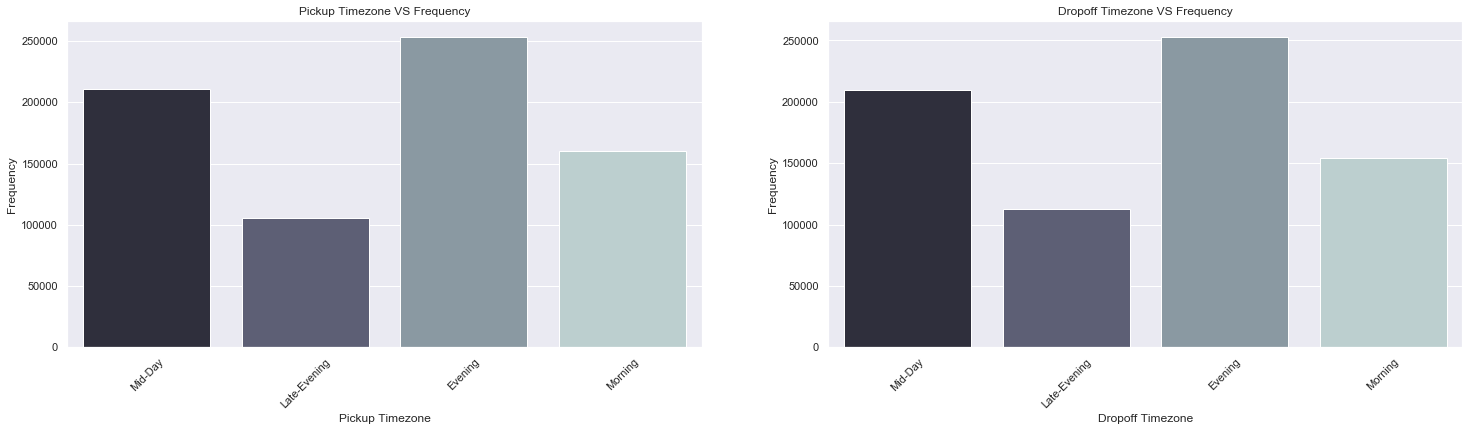

In [25]:
plt.figure(figsize = (25,6))
sns.set()

plt.subplot(1,2,1)
sns.countplot(x = 'Pickup_timezone',
              data = data,
              palette = 'bone')
plt.xticks(rotation=45)
plt.xlabel('Pickup Timezone')
plt.ylabel('Frequency')
plt.title('Pickup Timezone VS Frequency')

plt.subplot(1,2,2)
sns.countplot(x = 'Dropoff_timezone',
              data = data,
              palette = 'bone')
plt.xticks(rotation=45)
plt.xlabel('Dropoff Timezone')
plt.ylabel('Frequency')
plt.title('Dropoff Timezone VS Frequency')

plt.show()

Summary : 

  - We can see that most of the `pick-up's` and `drop's` are happened in `Evenings`.
  
  
  - Slight increase in dropoff ( `Late Evening` ) is observed when compared to pickup timings.
  
  
  - We will further analyze in bivariant analysis.
  

> > __`24-HRS DISTRIBUTION`__

In [26]:
data.head(3)

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr,Pickup_timezone,Dropoff_timezone
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16,Mid-Day,Mid-Day
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23,Late-Evening,Late-Evening
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18,Evening,Evening


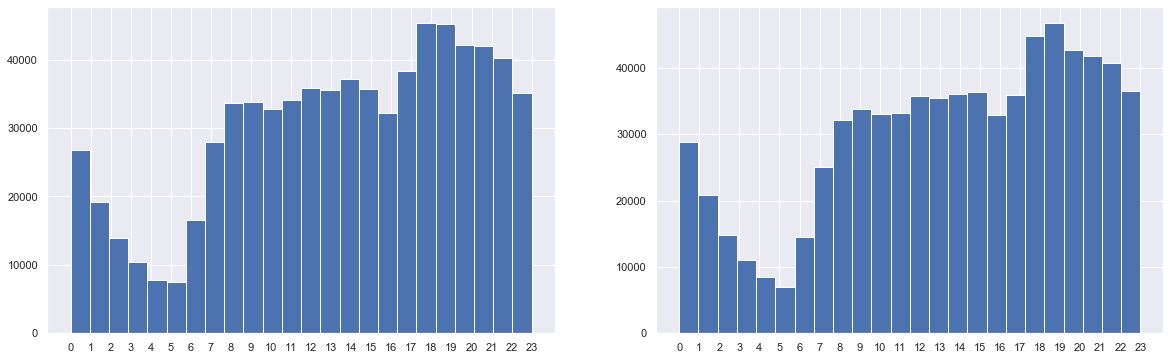

In [27]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
data['Pickup_hr'].hist(bins = 24)
plt.xticks(np.arange(0,24))


plt.subplot(1,2,2)
data['Dropoff_hr'].hist(bins = 24)
plt.xticks(np.arange(0,24))

plt.show()

>> __`STORE_FORWARD_FLAG`__

In [28]:
data['Store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: Store_and_fwd_flag, dtype: int64

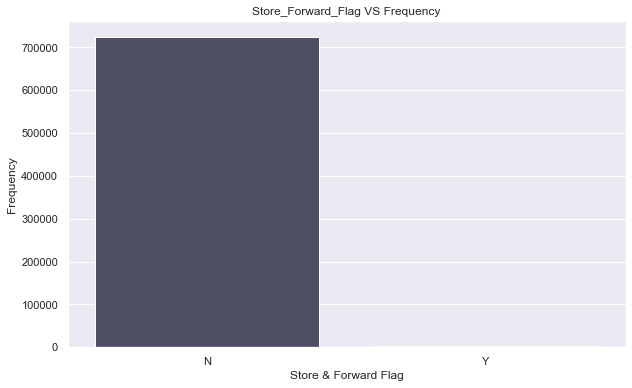

In [29]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Store_and_fwd_flag',
              data = data,
              palette = 'bone')
plt.xlabel("Store & Forward Flag")
plt.ylabel("Frequency")
plt.title("Store_Forward_Flag VS Frequency")

plt.show()

Summary :
 
  - We can see that nos of `N` flags are very much larger as compared to `Y` flag.
  
  
  - We need to analyze further whether it has any impact on trip_duration in bivariant analysis.

> > __`TRIP_DURATION`__

Skewness : 186.6784368781186, Kurtosis : 87142.4634003971


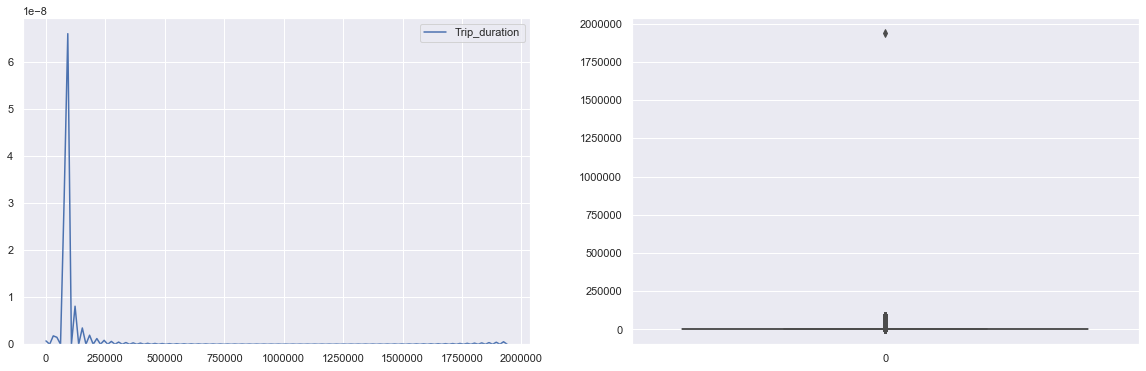

In [30]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.kdeplot(data = data['Trip_duration'])

plt.subplot(1,2,2)
sns.boxplot(data = data['Trip_duration'])

print("Skewness : {}, Kurtosis : {}".format(data['Trip_duration'].skew(), data['Trip_duration'].kurtosis()))

Summary : 

 - As the result obtained from skewness and kurtosis we can see that there are many outliers.
 
 
 - `Skewness` > 0.5 tells us that it is right skewed.
 
 
 - `Kurtosis` > 0 (Leptokurtic), gives a hint that there are many observatons lying on the tail of teh curve and can act as outlier.
 
 
 - We will handle this outlier seperatly later.

<br>

#### __`INFERENCE FROM UNIVARIANT ANALSYSIS :`__

 - `Vendor ID` needs to be further investigated with Trip_Duration.
 
 
 - Not more that 1-2 passengers boared the cab. People avoided travelling in groups.
 
 
 - There where more `Pickup's` and `Drop's` on Friday and less on Monday.
 
 
 - We could see pickup and drops where significantly high in `Evenings` and less in `Mornings`. There was little increase in frequency of drop's in `Late Evenings` as well.
 
 
 - `Store_Fwd_Flag` also showed a biased distribution (Having `N` more then `Y`) which needs to be looked.
 
 
 - Outliers where detected in `Trip_duration` which needs to be handled.

In [31]:
print("Data Shape :", data.shape)

Data Shape : (729322, 17)


In [32]:
data.Trip_duration.describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: Trip_duration, dtype: float64

<br>

### `OUTLIER DETECTION & ANALYSIS`

Data Shape:  (729322, 17)


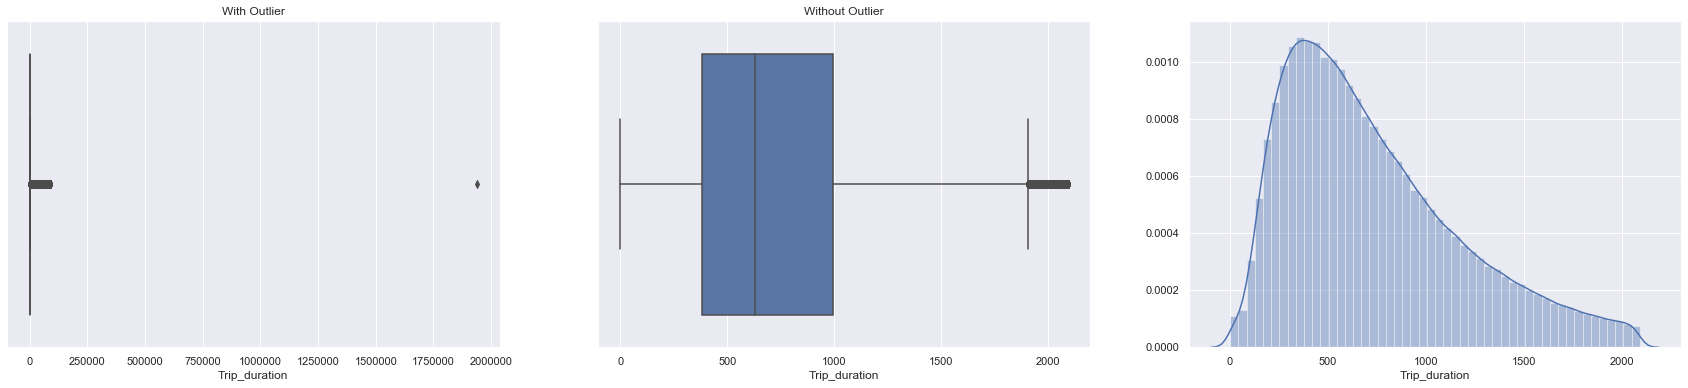

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize = (30,6))

# Before Removing Outlier
plt.subplot(1,3,1)
plt.title('With Outlier')
sns.boxplot(x=data['Trip_duration'])


# Identifying the quantile range 
Q1  = data['Trip_duration'].quantile(0.25)
Q3  = data['Trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outlier range 
data1 = data[~((data['Trip_duration'] < (Q1 - 1.5 * IQR)) |(data['Trip_duration'] > (Q3 + 1.5 * IQR)))]
print("Data Shape: ", data.shape)

# After removing the outlier
plt.subplot(1,3,2)
plt.title('Without Outlier')
sns.boxplot(x=data1['Trip_duration'])

# Distribution  After
plt.subplot(1,3,3)
sns.distplot(data1['Trip_duration'], );

plt.show()
plt.tight_layout()

In [34]:
data1.Trip_duration.describe()

count    692359.000000
mean        732.148973
std         448.236761
min           1.000000
25%         384.000000
50%         632.000000
75%         992.000000
max        2092.000000
Name: Trip_duration, dtype: float64

In [35]:
print("Skewness : {}, Kurtosis : {}".format(data1['Trip_duration'].skew(), data1['Trip_duration'].kurtosis()))

Skewness : 0.8593882918185477, Kurtosis : 0.12912022244986998


Summary : 

  - When we compare our previous univariant analysis of `Trip_Distribution` where outliers was there, we could not properly derive the statistical insights of our data (mean, median, max and min). Also the data was not in compareable format.
  
  
  - After successfully handling the outlier by `IQR (Inter Quantile Range)` technique, we could successfully remove approximately 36,000 observations from 8,00,000 observations which where acting as outlier.
  
  
  - The result of the previous step made the `Skewness` and `Kurtosis` drastically reduce from below values.
      
        - Before - Skewness : 186.6784368781186, Kurtosis : 87142.4634003971
       
       
        - After - Skewness : 0.8593882918185477, Kurtosis : 0.12912022244986998
       
       
   - Values where now seem to be in compareable range which could help us in statistical analysis further.

<br>

### `BIVARIANT ANALYSIS`

In [36]:
data.head(3)

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr,Pickup_timezone,Dropoff_timezone
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16,Mid-Day,Mid-Day
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23,Late-Evening,Late-Evening
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18,Evening,Evening


> >  __`VENDOR vs TRIP DURATION`__

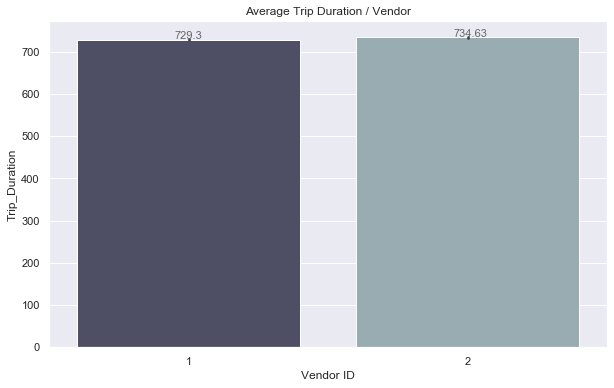

In [37]:
plt.figure(figsize = (10,6))

ax = sns.barplot(x = 'Vendor_id',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Vendor ID')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Vendor')

for i in ax.patches:
    ax.text(i.get_x()+.35, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

Summary :

 - From the insights we can derive that average trip duration provided by vendor 1 is less than vendor 2.
 
 
 - The possible reason of observing less average duration could be because vendor 1 was serving customer for shorter duration which resulted in lesser average as compared with vendor 2.
 
 

> >  __`PASSENGER_COUNT vs TRAVEL_DURATION`__

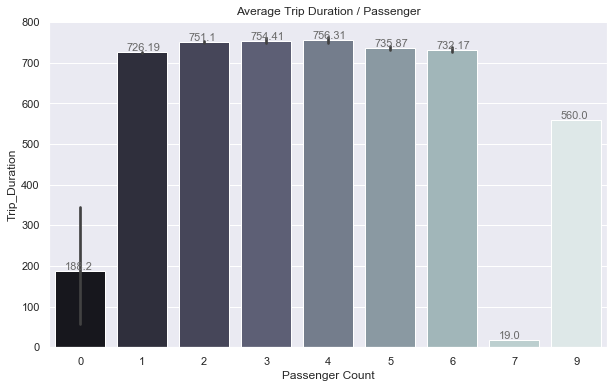

In [45]:
plt.figure(figsize = (10,6))

ax = sns.barplot(x = 'Passenger_count',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Passenger Count')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Passenger')

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

Summary : 

 - We observerd in univariant analysis that, the count of 1 and 2 type of passengers where more when compared to others.
 
 
 - During bivariant analysis when we are comparing with trip duration we observe that atmost 6 passengers are likely to be present in the cab during the trip.
 
 
 - Very few passengers avoid overcrowed cab.

> > __`STORE_FORWARD_FLAG vs TRIP_DURATION`__

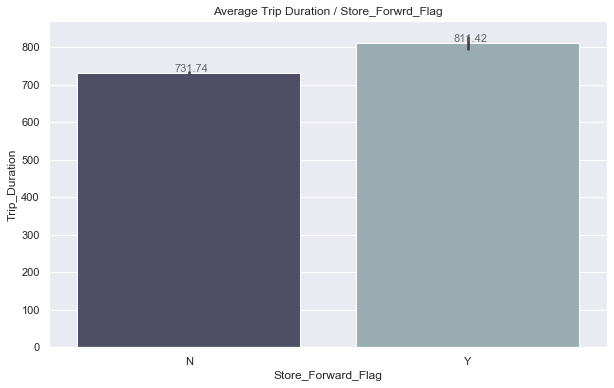

In [46]:
plt.figure(figsize = (10,6))

ax = sns.barplot(x = 'Store_and_fwd_flag',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Store_Forward_Flag')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Store_Forwrd_Flag')

for i in ax.patches:
    ax.text(i.get_x()+.35, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

Summary:

 - We can clearly see that most of the trips where recorded and sent to appropiate vendor


> >  __`MONTH vs TRIP_DURATION`__

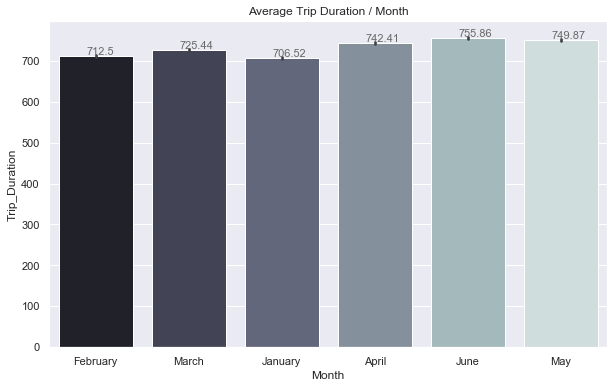

In [47]:
plt.figure(figsize = (10,6))

ax = sns.barplot(x = 'Month',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Month')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Month')

for i in ax.patches:
    ax.text(i.get_x()+.305, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.show()

Summary:
    
  - Highest average trip_duration was in  `June` .
    
    
  - Lowest  average trip_duration was in `January` .

> > __`DAY VS TRIP_DURATION`__

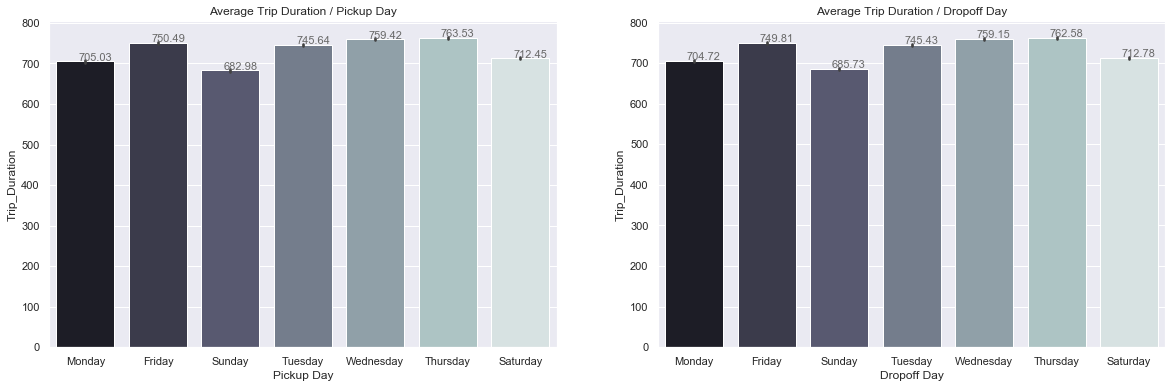

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
ax = sns.barplot(x = 'Pickup_day',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Pickup Day')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Pickup Day')

for i in ax.patches:
    ax.text(i.get_x()+.305, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    

plt.subplot(1,2,2)
ax = sns.barplot(x = 'Dropoff_day',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Dropoff Day')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Dropoff Day')

for i in ax.patches:
    ax.text(i.get_x()+.30, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
plt.show()
plt.tight_layout()

Summary : 
    
 - Average trip duration of pickup and drop was more on `Thursday`, `Wednesday` and `Friday`
 
 
 - Suprisingly average trip duration was observed to be low on `Sunday's` .

> > __`TIMEZONE vs TRIP_DURATION`__

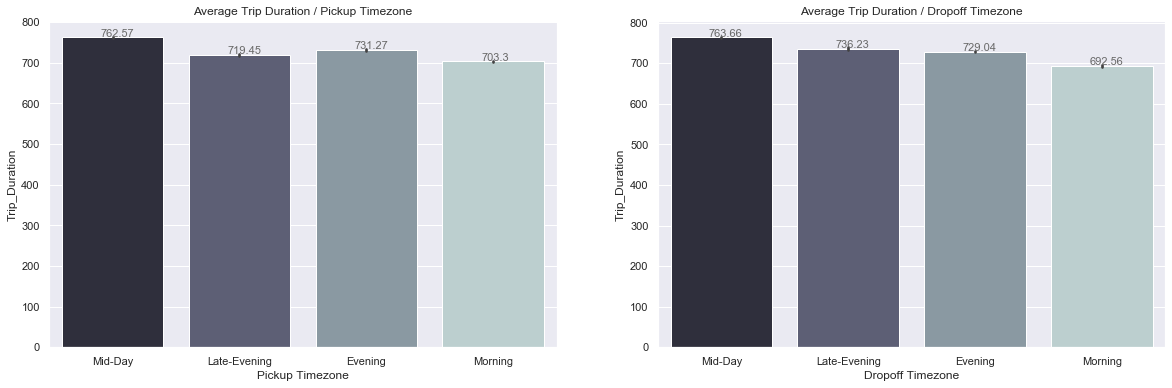

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
ax = sns.barplot(x = 'Pickup_timezone',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Pickup Timezone')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Pickup Timezone')

for i in ax.patches:
    ax.text(i.get_x()+.305, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    

plt.subplot(1,2,2)
ax = sns.barplot(x = 'Dropoff_timezone',
                 y = 'Trip_duration',
                 data = data1,
                 palette = 'bone')
plt.xlabel('Dropoff Timezone')
plt.ylabel('Trip_Duration')
plt.title('Average Trip Duration / Dropoff Timezone')

for i in ax.patches:
    ax.text(i.get_x()+.30, i.get_height()+2.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
plt.show()
plt.tight_layout()

Summary : 
    
 - We observed in univariant analysis that there where more trips taken during `Evening`.
 
 
 - In bivariant analysis when we are comparing with trip_duration we come to know follwoing result :
       - Higest avg. trip_duration was `Mid-Day`
       
       - Lowest avg. trip_duration was `Morning`

In [50]:
data.head(3)

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr,Pickup_timezone,Dropoff_timezone
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16,Mid-Day,Mid-Day
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23,Late-Evening,Late-Evening
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18,Evening,Evening


<br>

### `ANALYZING TRIP DURATION - MINUTES `

In [53]:
# Function -> Seconds to Minutes

def sec_min(x):
    return round(x / 60, 2)

In [61]:
data1['Trip_duration_Mins'] = data['Trip_duration'].map(lambda x : sec_min(x))

In [63]:
data1.Trip_duration_Mins.describe()

count    692359.000000
mean         12.202487
std           7.470620
min           0.020000
25%           6.400000
50%          10.530000
75%          16.530000
max          34.870000
Name: Trip_duration_Mins, dtype: float64

In [64]:
def trip_duration_timezone(x):
    if x < 5:
        return 'Very Short (x < 5)'
    elif x >= 5 and x < 10:
        return 'Short (5 <= x < 10)'
    elif x >=10 and x < 20:
        return 'Medium (10 <= x < 20)'
    else:
        return 'Long (x > 20)'

In [71]:
data1['Trip_duration_timezone'] = data1['Trip_duration_Mins'].map(lambda x : trip_duration_timezone(x))

In [74]:
data1.Trip_duration_timezone.value_counts()

Medium (10 <= x < 20)    255824
Short (5 <= x < 10)      215487
Long (x > 20)            110996
Very Short (x < 5)       110052
Name: Trip_duration_timezone, dtype: int64

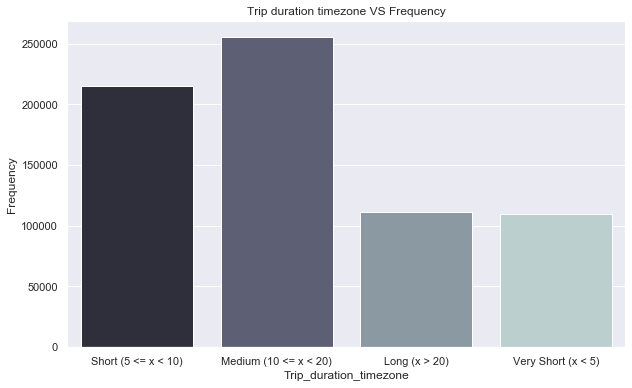

In [75]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Trip_duration_timezone',
              data = data1,
              palette = 'bone')
plt.xlabel("Trip_duration_timezone")
plt.ylabel("Frequency")
plt.title("Trip duration timezone VS Frequency")

plt.show()

In [83]:
data.head()

,Vendor_id,Pickup_datetime,Dropoff_datetime,Passenger_count,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Store_and_fwd_flag,Trip_duration,Pickup_day,Dropoff_day,Month,Pickup_hr,Dropoff_hr,Pickup_timezone,Dropoff_timezone
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,16,16,Mid-Day,Mid-Day
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,23,23,Late-Evening,Late-Evening
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,17,18,Evening,Evening
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,January,9,10,Morning,Morning
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,February,6,6,Morning,Morning


In [108]:
pd.crosstab(data1['Trip_duration_timezone'], data1['Pickup_day'])

Pickup_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Trip_duration_timezone,,,,,,,
Long (x > 20),18059,12812,15443,12494,18433,16189,17566
Medium (10 <= x < 20),39775,32192,39442,32715,38737,35801,37162
Short (5 <= x < 10),31636,29189,34027,31462,30144,29331,29698
Very Short (x < 5),15985,15224,17508,17227,15057,14557,14494


 - For all the days trip_duration was observed to be `Medium`

In [89]:
pd.crosstab(data1['Trip_duration_timezone'], data1['Pickup_timezone'])

Pickup_timezone,Evening,Late-Evening,Mid-Day,Morning
Trip_duration_timezone,,,,
Long (x > 20),37297,15877,34997,22825
Medium (10 <= x < 20),91988,37370,73282,53184
Short (5 <= x < 10),76347,32208,58021,48911
Very Short (x < 5),36385,17216,28530,27921


  - `Short` and `Medium` duration type of trips where observed most during the evenings.

In [100]:
pd.crosstab(data1['Trip_duration_timezone'], data1['Month'])

Month,April,February,January,June,March,May
Trip_duration_timezone,,,,,,
Long (x > 20),19835,16882,15760,19263,19036,20220
Medium (10 <= x < 20),44465,42092,39825,41217,45177,43048
Short (5 <= x < 10),36387,36823,35833,32807,38533,35104
Very Short (x < 5),18545,18955,18302,16488,19745,18017


- For all the months people are observed taking `Medium` and `Short` trip.


- `March` being the highest in terms of medium duration trips.


- `April` being the lowest in terms of short duration trips.
    

Text(0.5, 1, 'Pearson Correlation')

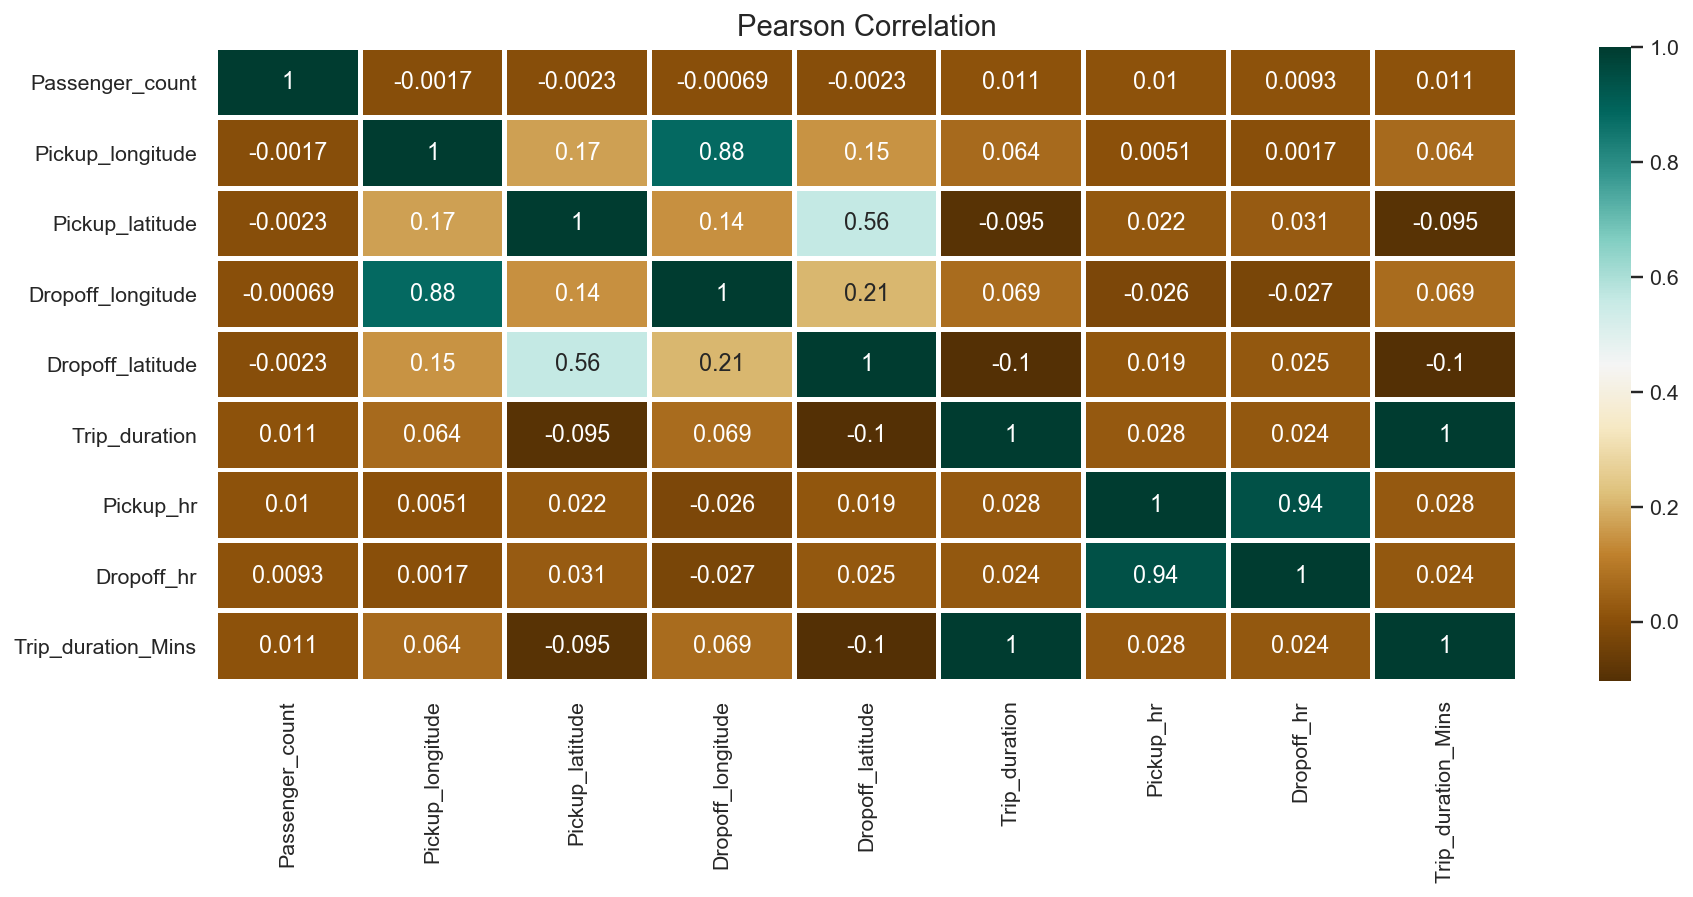

In [105]:
#Plotting heatmap using all methods for all numerical variables.

plt.figure(figsize=(15,6), dpi=140)

corr_matrix = data1.corr()
ax = sns.heatmap(corr_matrix, cmap='BrBG', annot=True, linewidth = 2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Pearson Correlation", fontsize=15)

<BR>

### `CONCLUSION - EDA`

 - Lots of outlier values where observed under `Trip_Duration`. We handled it using IQR technique to give better statistical results.
 
 
 - `Vendor 1` was observed to be providing service only for shorter duration. For longer duration we had `Vendor 2`.
 
 
 - At most 6 passengers where observed to be there in the cab. 
 
 
 - Most of the pickups happened on `Friday's`, `Saturday's` and `Thursday's`.
 
 
 - Pickup and drops where observed more during the evenings.
 
 
 - Average trip duration results as follows:
        - Month    : `Jun` was highest, `Jan` was lowest
        
        - Timezone : `Mid-Day` was highest, `Morning` was lowest
      
        - Day      : `Wed`, `Thur`, `Fri` was highest. `Sun` was lowest
      
  
  - For lesser trip durtion `Store_Fwd_FLag` was not recorded whereas for long trip duration it was recorded.